<a href="https://colab.research.google.com/github/abdulrahman-hesham/ManufacturingDowntime/blob/Overview/Python_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Import necessary libraries</b>
</div>



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Read the Excel file</b>
</div>



In [ ]:
df=pd.read_excel("Manufacturing_Line_Productivity.xlsx")
df

,Date,Product,Batch,Operator,Start Time,End Time
0,2024-08-29,OR-600,422111,Mac,11:50:00,14:05:00
1,2024-08-29,LE-600,422112,Mac,14:05:00,15:45:00
2,2024-08-29,LE-600,422113,Mac,15:45:00,17:35:00
3,2024-08-29,LE-600,422114,Mac,17:35:00,19:15:00
4,2024-08-29,LE-600,422115,Charlie,19:15:00,20:39:00
5,2024-08-29,LE-600,422116,Charlie,20:39:00,21:39:00
6,2024-08-29,LE-600,422117,Charlie,21:39:00,22:54:00
7,2024-08-30,CO-600,422118,Dee,04:05:00,06:05:00
8,2024-08-30,CO-600,422119,Dee,06:05:00,07:30:00
9,2024-08-30,CO-600,422120,Dee,07:30:00,09:22:00



<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Display sheet names inside the Excel file</b>
</div>



In [ ]:
xls = pd.ExcelFile('Manufacturing_Line_Productivity.xlsx')
print(xls.sheet_names)

Line_productivity = pd.read_excel(xls, sheet_name="Line productivity")
Products = pd.read_excel(xls, sheet_name="Products")
Downtime_factors = pd.read_excel(xls, sheet_name="Downtime factors")
Line_downtime= pd.read_excel(xls, sheet_name="Line downtime")


print(Line_productivity.head(),"\n\n")
print(Products.head(),"\n\n")
print(Downtime_factors.head(),"\n\n")
print(Line_downtime.head(),"\n\n")

print(Line_productivity.info(),"\n\n")
print(Products.info(),"\n\n")
print(Downtime_factors.info(),"\n\n")
print(Line_downtime.info(),"\n\n")




['Line productivity', 'Sheet1', 'Products', 'Downtime factors', 'Line downtime']
        Date Product   Batch Operator Start Time  End Time
0 2024-08-29  OR-600  422111      Mac   11:50:00  14:05:00
1 2024-08-29  LE-600  422112      Mac   14:05:00  15:45:00
2 2024-08-29  LE-600  422113      Mac   15:45:00  17:35:00
3 2024-08-29  LE-600  422114      Mac   17:35:00  19:15:00
4 2024-08-29  LE-600  422115  Charlie   19:15:00  20:39:00 


  Product      Flavor    Size  Min batch time
0  OR-600      Orange  600 ml              60
1  LE-600  Lemon lime  600 ml              60
2  CO-600        Cola  600 ml              60
3  DC-600   Diet Cola  600 ml              60
4  RB-600  Root Berry  600 ml              60 


   Factor         Description Operator Error
0       1      Emergency stop             No
1       2        Batch change            Yes
2       3      Labeling error             No
3       4  Inventory shortage             No
4       5       Product spill            Yes 


    Batch 

KeyError: 0


<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Unpivot table</b>
</div>



In [ ]:
Line_downtime = Line_downtime.melt(
    id_vars=["Batch"],
    var_name="Factor",
    value_name="Downtime"
)

Line_downtime.dropna(inplace=True)
Line_downtime


,Batch,Factor,Downtime
38,422111,2,60.0
39,422112,2,20.0
40,422113,2,50.0
44,422117,2,10.0
57,422130,2,20.0
...,...,...,...
432,422125,12,10.0
436,422129,12,15.0
442,422135,12,15.0
448,422141,12,7.0



<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Calculate downtime duration between start and end time</b>
</div>



In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Start Time': ['01:05:00', '02:15:00'],
    'End Time': ['02:05:00', '03:25:00']
})

df['Start Time'] = pd.to_datetime('1900-01-01 ' + df['Start Time'])
df['End Time'] = pd.to_datetime('1900-01-01 ' + df['End Time'])

df['Duration'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 60

df['Time of Day'] = df['Start Time'].dt.hour.apply(lambda x: 'Morning' if x < 12 else 'Evening')

print(df)

           Start Time            End Time  Duration Time of Day
0 1900-01-01 01:05:00 1900-01-01 02:05:00      60.0     Morning
1 1900-01-01 02:15:00 1900-01-01 03:25:00      70.0     Morning




<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Identify the day with the highest number of downtime occurrences</b>
</div>



In [ ]:
most_downtime_day = Line_productivity['Date'].value_counts().idxmax()
most_downtime_count = Line_productivity['Date'].value_counts().max()

print(f"The day with the highest downtime occurrence: {most_downtime_day}")
print(f"The number of downtimes on this day: {most_downtime_count}")


The day with the highest downtime occurrence: 2024-08-30 00:00:00
The number of downtimes on this day: 12



<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Merge downtime data with product and flavor information to analyze downtime by flavor</b>
</div>



Flavor with Most Downtime: Cola (771.00 minutes)


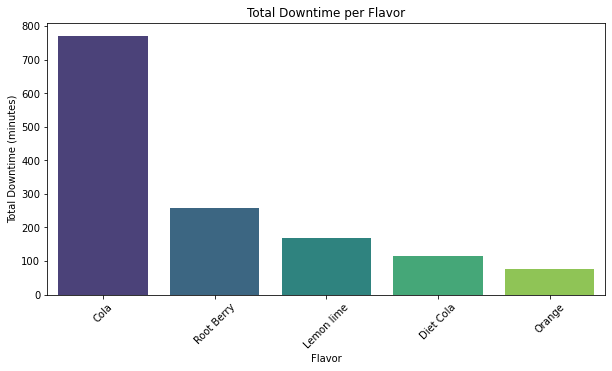

In [ ]:
merged_data = Line_downtime.merge(Line_productivity[['Batch', 'Product']], on='Batch', how='left')

merged_data = merged_data.merge(Products[['Product', 'Flavor']], on='Product', how='left')

downtime_per_flavor = merged_data.groupby("Flavor")["Downtime"].sum().reset_index()

downtime_per_flavor = downtime_per_flavor.sort_values(by="Downtime", ascending=False)

most_problematic_flavor = downtime_per_flavor.iloc[0]
print(f"Flavor with Most Downtime: {most_problematic_flavor['Flavor']} ({most_problematic_flavor['Downtime']:.2f} minutes)")


plt.figure(figsize=(10, 5))
sns.barplot(data=downtime_per_flavor, x="Flavor", y="Downtime", palette="viridis")

plt.xlabel("Flavor")
plt.ylabel("Total Downtime (minutes)")
plt.title("Total Downtime per Flavor")
plt.xticks(rotation=45)

plt.show()


<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Identify the product with the most downtime and visualize the total downtime for each product</b>
</div>



Product with Most Downtime: CO-600 (494.00 minutes)


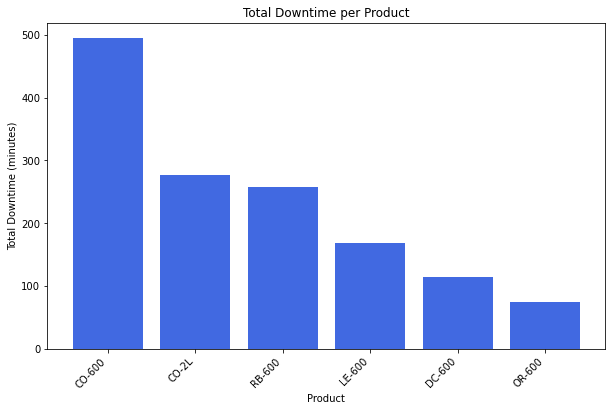

In [ ]:
most_problematic_product = downtime_per_product.iloc[0]
print(f"Product with Most Downtime: {most_problematic_product['Product']} ({most_problematic_product['Downtime']:.2f} minutes)")
plt.figure(figsize=(10, 6))
plt.bar(downtime_per_product["Product"], downtime_per_product["Downtime"], color='royalblue')

plt.xlabel("Product")
plt.ylabel("Total Downtime (minutes)")
plt.title("Total Downtime per Product")
plt.xticks(rotation=45, ha="right")

plt.show()


<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Extract and display the top 5 factors that contribute to the most downtime</b>
</div>



In [ ]:
factor_descriptions = {
    1: "Emergency Stop", 2: "Batch Change", 3: "Labeling Error", 4: "Inventory Shortage",
    5: "Product Spill", 6: "Machine Failure", 7: "Power Outage", 8: "Raw Material Delay",
    9: "Operator Error", 10: "Maintenance", 11: "Quality Check Failure", 12: "Other"
}

predicted_issues = Line_downtime.groupby("Factor")["Downtime"].sum().rename(index=factor_descriptions).sort_values(ascending=False).head()

print(predicted_issues.to_string(index=True, header=False))


Machine Failure       332.0
Power Outage          254.0
Inventory Shortage    225.0
Batch Change          160.0
Raw Material Delay    145.0



<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>most Common Downtime Factor</b>
</div>



In [ ]:
merged_data = Line_downtime.merge(Downtime_factors, on="Factor", how="left")

factor_counts = merged_data["Description"].value_counts().reset_index()
factor_counts.columns = ["Downtime Factor", "Count"]

most_common_factor = factor_counts.iloc[0]

print(f"Most Common Downtime Factor: {most_common_factor['Downtime Factor']} ({most_common_factor['Count']} occurrences)")

Most Common Downtime Factor: Machine adjustment (12 occurrences)




<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Flavor with Most Downtime

</b>
</div>



In [ ]:


Line_productivity = pd.read_excel(xls, sheet_name="Line productivity")
Products = pd.read_excel(xls, sheet_name="Products")
Downtime_factors = pd.read_excel(xls, sheet_name="Downtime factors")
Line_downtime = pd.read_excel(xls, sheet_name="Line downtime")

Line_downtime = Line_downtime.melt(id_vars=["Batch"], var_name="Factor", value_name="Downtime")
Line_downtime.dropna(inplace=True)

merged_data = Line_downtime.merge(Downtime_factors, on="Factor", how="left")

merged_data = merged_data.merge(Line_productivity[['Batch', 'Product']], on="Batch", how="left")

merged_data = merged_data.merge(Products[['Product', 'Flavor']], on="Product", how="left")

downtime_per_flavor = merged_data.groupby("Flavor")["Downtime"].sum().reset_index()

most_problematic_flavor = downtime_per_flavor.loc[downtime_per_flavor["Downtime"].idxmax()]

print(f"Flavor with Most Downtime: {most_problematic_flavor['Flavor']} ({most_problematic_flavor['Downtime']:.2f} minutes)")



Flavor with Most Downtime: Cola (771.00 minutes)




<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Factor with Highest Total Downtime

</b>
</div>


Factor with Highest Total Downtime: Machine adjustment (332.0 minutes)


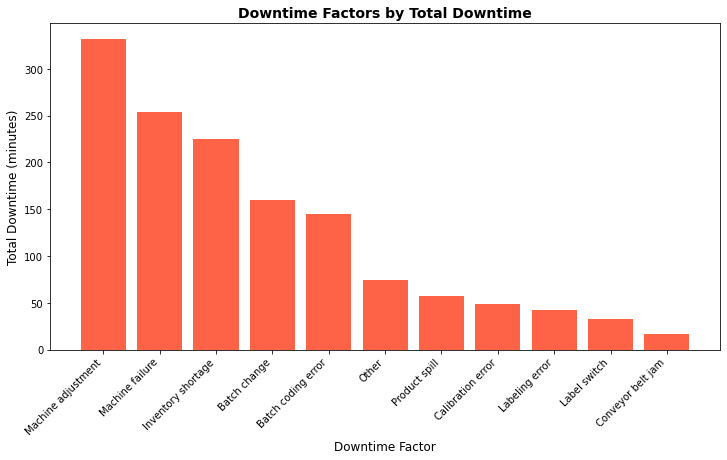

In [ ]:

merged_data = Line_downtime.merge(Downtime_factors, on="Factor", how="left")

factor_downtime = merged_data.groupby("Description")["Downtime"].sum().reset_index()

factor_downtime = factor_downtime.sort_values(by="Downtime", ascending=False)

most_downtime_factor = factor_downtime.iloc[0]

print(f"Factor with Highest Total Downtime: {most_downtime_factor['Description']} ({most_downtime_factor['Downtime']} minutes)")

plt.figure(figsize=(12, 6))
plt.bar(factor_downtime["Description"], factor_downtime["Downtime"], color='tomato')

plt.xlabel("Downtime Factor", fontsize=12)
plt.ylabel("Total Downtime (minutes)", fontsize=12)
plt.title("Downtime Factors by Total Downtime", fontsize=14, fontweight="bold")

plt.xticks(rotation=45, ha="right", fontsize=10)

plt.show()


<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Most Produced Product

</b>
</div>


In [ ]:
most_produced_product = Line_productivity["Product"].value_counts().idxmax()

print(f"Most Produced Product: {most_produced_product}")


Most Produced Product: CO-600




<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Most Active Production Day

</b>
</div>



In [ ]:

most_active_day = Line_productivity["Date"].value_counts().idxmax()

print(f"Most Active Production Day: {most_active_day.strftime('%Y-%m-%d')}")


Most Active Production Day: 2024-08-30



<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Most Produced Flavor

</b>
</div>



In [ ]:
merged_data = Line_productivity.merge(Products[['Product', 'Flavor']], on='Product', how='left')

most_produced_flavor = merged_data["Flavor"].value_counts().idxmax()

print(f"Most Produced Flavor: {most_produced_flavor}")


Most Produced Flavor: Cola




<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 18px; border-radius: 8px;">
    <b>Operator with the Highest Productivity

</b>
</div>


Most Active Operator: Charlie


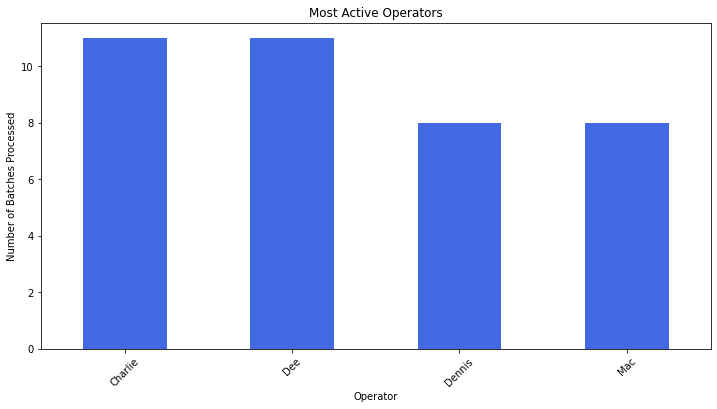

In [ ]:
most_active_operator = Line_productivity["Operator"].value_counts().idxmax()

print(f"Most Active Operator: {most_active_operator}")

operator_counts = Line_productivity["Operator"].value_counts()

plt.figure(figsize=(12, 6))
operator_counts.plot(kind="bar", color='royalblue')

plt.xlabel("Operator")
plt.ylabel("Number of Batches Processed")
plt.title("Most Active Operators")
plt.xticks(rotation=45)

plt.show()



<div style="background-color: #2F4F4F; color: white; padding: 10px; text-align: center; font-size: 20px; border-radius: 8px;">
    <b>PREDICTION

</b>
</div>


In [ ]:
batches_per_day = Line_productivity.groupby("Date")["Batch"].nunique()

predicted_batches = batches_per_day.mean()

print(f"Predicted Number of Batches for Next Day: {predicted_batches:.0f}")


Predicted Number of Batches for Next Day: 8


In [ ]:
daily_downtime = Line_downtime.groupby("Batch")["Downtime"].sum()

predicted_downtime = daily_downtime.mean()

print(f"Predicted Downtime for Next Day: {predicted_downtime:.2f} minutes")


Predicted Downtime for Next Day: 39.66 minutes


In [ ]:
downtime_counts_per_day = Line_downtime.groupby("Batch")["Factor"].count()
predicted_downtime_events = round(downtime_counts_per_day.mean())
print(f" Expected number of stops: {predicted_downtime_events} ")


 Expected number of stops: 2 


In [ ]:
merged_data = Line_downtime.merge(Downtime_factors, on="Factor", how="left")
top_cause = merged_data.groupby("Description")["Downtime"].sum().sort_values(ascending=False).idxmax()
print(f" The most expected reason to stop: {top_cause}")


 The most expected reason to stop: Machine adjustment
